<a href="https://colab.research.google.com/github/KlebersonMariaCC/cdp_2022.2/blob/main/CRA_Regression_Lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependências

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Carregando os dados

In [ ]:
url = 'https://drive.google.com/file/d/1AWZQSho1ArFBxwLKu0-hSBOSNdc_jKEt/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,matricula,Vetorial,LPT,P1,IC,LP1,Cálculo2,Discreta,P2,Grafos,Fís.Clássica,LP2,cra,Cálculo1
0,0cc3d63edf0b986cb87e345972857e15,8.6,10.0,9.0,9.1,8.6,8.4,8.3,8.8,8.2,7.9,9.4,8.477647,8.7
1,0d78246db769dc958ce19fc414050b2a,5.6,7.0,7.7,7.0,8.1,6.2,7.3,8.2,5.4,7.7,8.9,6.851724,7.0
2,0f5bb983df06b90337dc2c6301fef3f6,10.0,9.8,7.9,9.6,8.3,8.7,8.8,9.5,9.2,8.6,9.7,9.090588,8.6
3,1307a4421a67a497cea198e8ccfb97ee,6.1,8.3,6.8,8.2,7.1,8.0,6.3,8.9,7.0,8.5,9.0,7.283516,7.8
4,1432d50cf8519694ab992c414d90a130,8.8,9.3,5.0,8.5,5.1,5.0,5.8,7.1,5.4,8.7,8.2,7.205747,5.2


# Sumário dos Dados

In [ ]:
df.describe()

,Vetorial,LPT,P1,IC,LP1,Cálculo2,Discreta,P2,Grafos,Fís.Clássica,LP2,cra,Cálculo1
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,7.280682,8.480114,7.407955,8.172727,7.597727,6.323864,6.764773,7.941364,7.196591,7.107955,8.631818,7.332535,7.200000
std,1.404169,0.984522,1.346278,0.894007,1.371799,1.293662,1.228403,0.990478,1.277970,0.908987,0.969008,0.849758,1.228493
min,5.000000,6.200000,5.000000,5.900000,5.000000,5.000000,5.000000,5.300000,5.000000,5.000000,5.000000,4.874468,5.000000
25%,6.275000,7.700000,6.500000,7.500000,6.600000,5.100000,5.675000,7.300000,6.300000,7.000000,8.200000,6.841484,6.275000
50%,7.100000,8.500000,7.750000,8.200000,7.800000,5.800000,6.750000,7.950000,7.200000,7.000000,8.900000,7.274746,7.200000
75%,8.325000,9.300000,8.325000,8.800000,8.600000,7.500000,7.600000,8.800000,8.200000,7.500000,9.200000,7.883292,8.125000
max,10.000000,10.000000,10.000000,10.000000,10.000000,9.300000,9.600000,9.600000,10.000000,9.100000,9.700000,9.090588,9.800000


# Partição Treino/Teste

In [ ]:
x = df[['Cálculo1', 'LPT', 'P1', 'IC', 'Cálculo2']]
y = df.cra.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [ ]:
x_train

,Cálculo1,LPT,P1,IC,Cálculo2
68,7.0,8.0,7.0,8.6,5.3
85,5.0,7.2,7.8,7.4,5.3
65,7.5,8.5,7.3,8.6,7.0
53,7.2,9.1,8.2,8.9,5.2
80,7.2,8.3,7.8,8.1,9.3
...,...,...,...,...,...
20,7.0,7.5,5.6,8.0,5.6
60,7.2,7.7,8.3,7.9,5.0
71,8.2,6.2,5.4,6.7,5.1
14,7.4,7.5,6.5,7.3,5.4


# 2. Construa um gráfico de correlação mostrando as correlações entre cada variável independente com a variável dependente (nos dados de treino);

Transformando o dados de treino y como uma série(no Pandas). Será util na hora de calcular a correlação. Aqui copiamos os indices da mostragem em x para que não haja problemas no calculo da correlação.

In [ ]:
ytrain = pd.Series(y_train, index = x_train.index, name = 'cra')
ytrain


68    7.869880
85    7.282022
65    7.684706
53    7.225806
80    6.931959
        ...   
20    7.058621
60    8.022353
71    7.250575
14    6.116279
51    7.495402
Name: cra, Length: 79, dtype: float64

Correlação de pearson das colunas x_train com ytrain.

In [ ]:
correlation = x_train.corrwith(ytrain)
correlation

Cálculo1    0.289495
LPT         0.246849
P1          0.511601
IC          0.563968
Cálculo2    0.241463
dtype: float64

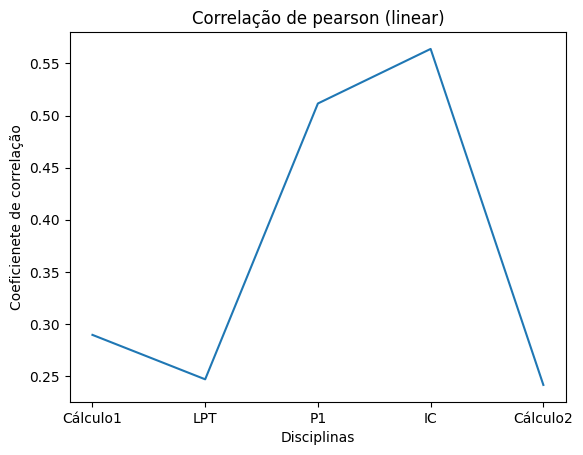

In [ ]:
plt.plot(correlation)
plt.title('Correlação de pearson (linear)')
plt.xlabel('Disciplinas')
plt.ylabel('Coeficienete de correlação')

plt.show()

matriz de correlação:

In [ ]:
dtrain = x_train.join(ytrain)
dtrain

,Cálculo1,LPT,P1,IC,Cálculo2,cra
68,7.0,8.0,7.0,8.6,5.3,7.869880
85,5.0,7.2,7.8,7.4,5.3,7.282022
65,7.5,8.5,7.3,8.6,7.0,7.684706
53,7.2,9.1,8.2,8.9,5.2,7.225806
80,7.2,8.3,7.8,8.1,9.3,6.931959
...,...,...,...,...,...,...
20,7.0,7.5,5.6,8.0,5.6,7.058621
60,7.2,7.7,8.3,7.9,5.0,8.022353
71,8.2,6.2,5.4,6.7,5.1,7.250575
14,7.4,7.5,6.5,7.3,5.4,6.116279


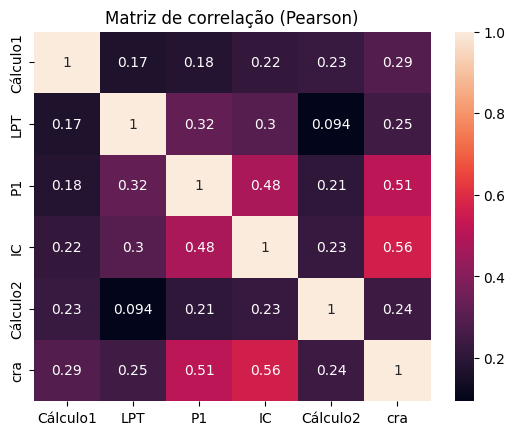

In [ ]:
correlation = dtrain.corr()
sns.heatmap(correlation,annot=True)
plt.title("Matriz de correlação (Pearson)")
plt.show()


Olhando tanto para a corolação da matriz de correlação (cores mais avermelhadas indicam maior correlação), tanto para os valores absolutos, temos que as três materias que mais se correlacionam positivamente com o CRA são  IC, P1 e Calculo 1

#3.Escolha a variável melhor correlacionada e construa uma regressão simples. Meça o RMSE no treino e teste.

Fazendo a regressão linear entre as notas de IC e o CRA

In [ ]:
regr = LinearRegression()


Treinando o modelo:

In [ ]:
x_ic = np.array(x_train.IC).reshape(-1,1)

regr.fit(x_ic,y_train)
regr.coef_
regr.intercept_

2.8673970230611703

Plotando os dados:

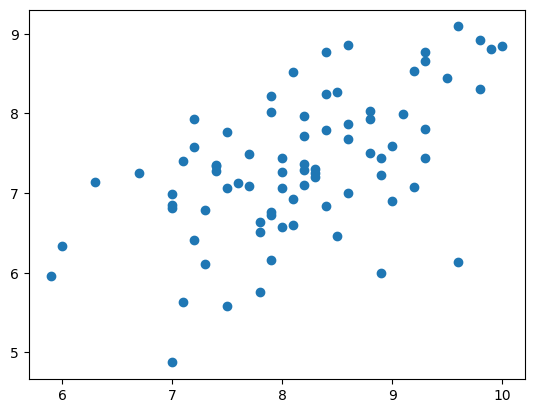

In [ ]:
plt.scatter(x_ic,y_train)
plt.show()

Fazendo previsôes :

In [ ]:
y_pred = regr.predict(x_ic)
y_pred


array([7.57715479, 6.91997929, 7.57715479, 7.74144867, 7.30333166,
       7.35809629, 6.97474391, 6.31756841, 7.79621329, 8.23433029,
       6.81045004, 8.12480104, 7.13903779, 7.24856704, 7.35809629,
       7.90574254, 7.19380241, 7.96050717, 7.90574254, 7.19380241,
       6.75568541, 7.46762554, 7.79621329, 7.96050717, 6.70092079,
       6.09850991, 7.19380241, 7.46762554, 7.74144867, 7.02950854,
       8.34385954, 7.30333166, 7.96050717, 7.41286091, 7.08427316,
       7.35809629, 7.96050717, 6.15327454, 7.19380241, 7.35809629,
       7.57715479, 8.07003642, 6.91997929, 7.41286091, 7.41286091,
       6.81045004, 6.81045004, 6.70092079, 7.68668404, 8.23433029,
       7.30333166, 7.24856704, 7.85097792, 6.97474391, 7.68668404,
       7.35809629, 7.52239017, 6.97474391, 7.46762554, 6.91997929,
       6.70092079, 7.13903779, 7.74144867, 7.13903779, 7.24856704,
       7.68668404, 6.70092079, 6.86521466, 7.46762554, 8.12480104,
       7.52239017, 6.75568541, 8.28909492, 7.57715479, 7.24856

Calculando o RMSE do treino

In [ ]:
rmse_train = mean_squared_error(y_train,y_pred,squared=False)
rmse_train

0.7184727727075744

Coeficiente R² do treino:

In [ ]:
r2 = r2_score(y_train,y_pred)
r2

0.318060131877395

Fazendo as previsoes para os dados de teste:

In [ ]:
x_ic_test = np.array(x_test.IC).reshape(-1,1)
print(x_ic_test)
y_pred = regr.predict(x_ic_test)
y_pred

[[9.8]
 [9.1]
 [8.3]
 [8.4]
 [8.1]
 [7. ]
 [7.5]
 [7.4]
 [8.5]]


array([8.23433029, 7.85097792, 7.41286091, 7.46762554, 7.30333166,
       6.70092079, 6.97474391, 6.91997929, 7.52239017])

Calculando o coeficiente R² nos dados de teste

In [ ]:
r2 = r2_score(y_test,y_pred)
r2

0.4826039994445386

Plotando o grafico com as previsoes:

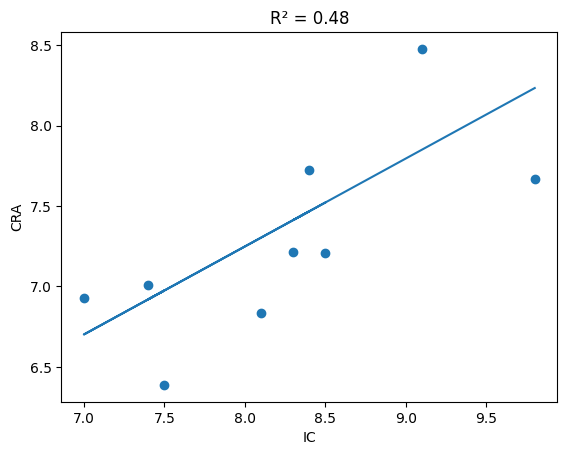

In [ ]:
plt.scatter(x_ic_test,y_test)
plt.plot(x_ic_test,y_pred)
plt.title("R² = {:.2f}".format(r2))
plt.xlabel("IC")
plt.ylabel("CRA")
plt.show()

RMSE nos dados de teste:

In [ ]:
rmse_test = mean_squared_error(y_test,y_pred,squared=False)
rmse_test

0.4142871496766733

Resumindo:

In [ ]:
print("r2 = {r2:.3f}".format(r2 = r2))
print("rmse_train: {rmse_train:.3f}".format(rmse_train = rmse_train))
print("rmse_test: {rmse_test:.3f}".format(rmse_test = rmse_test))

r2 = 0.483
rmse_train: 0.718
rmse_test: 0.414


Comparando os dados acima, nota-se até uma boa predição a partir do fato do rmse dos dados de teste ser menor que o de treino (o que pode ser devido a amostragem) , entretando o R² indica que apenas a nota de IC não é suficiente para  modelar o problema em relação CRA.

#4. Mesma coisa que item 3 acima mas agora com as três variáveis melhores correlacionadas.

Como comentado na questão 2, as notas que tem a maior correlação  positiva (linear de Pearson) com o CRA são IC, P1 e Cálculo 1. Vamos construir o modelo usando essas 3 notas como atributos do modelo, para isso, nossos dados terão que ter apenas as 3 colunas:

In [ ]:
regr = LinearRegression()
Xtrain = x_train[['IC','P1', 'Cálculo1']]
Xtrain

,IC,P1,Cálculo1
68,8.6,7.0,7.0
85,7.4,7.8,5.0
65,8.6,7.3,7.5
53,8.9,8.2,7.2
80,8.1,7.8,7.2
...,...,...,...
20,8.0,5.6,7.0
60,7.9,8.3,7.2
71,6.7,5.4,8.2
14,7.3,6.5,7.4


Treinando o modelo:

In [ ]:
regr.fit(Xtrain,y_train)
regr.coef_

array([0.37776043, 0.19416447, 0.10787268])

Calculo do rmse dos dados de treino

Fazendo as previsôes:

In [ ]:
Xtest = x_test[['IC', 'P1', 'Cálculo1']]
Xtest

,IC,P1,Cálculo1
76,9.8,9.1,7.8
0,9.1,9.0,8.7
26,8.3,6.2,8.8
22,8.4,7.7,7.2
12,8.1,6.7,5.6
67,7.0,8.3,7.3
10,7.5,8.4,6.6
18,7.4,8.2,5.8
4,8.5,5.0,5.2


Previsão com os dados de treino:

In [ ]:
y_pred = regr.predict(Xtrain)
y_pred

array([7.40489117, 6.89116486, 7.51707685, 7.77279119, 7.39291706,
       6.97333075, 7.30217911, 6.47994774, 7.45027757, 8.06100051,
       7.00330933, 8.38025163, 7.39608761, 7.40259673, 7.52561725,
       7.74373311, 7.6366573 , 7.97998344, 7.89906468, 7.41445039,
       6.68723831, 7.27971256, 7.72427227, 8.40715481, 6.56963521,
       5.89736238, 7.29147744, 7.05534756, 7.91518377, 6.69705114,
       8.81829269, 7.11892872, 7.78797388, 7.62165217, 7.09726858,
       7.30125225, 7.97998662, 6.20913313, 6.70898086, 7.27967135,
       7.5817941 , 8.228135  , 7.59664075, 7.33686702, 7.27214341,
       6.85444566, 6.62793212, 6.91697952, 7.77168995, 8.49679788,
       7.60649797, 6.58494788, 7.73400587, 6.87070747, 7.50201779,
       7.68958436, 7.73171461, 6.48452072, 7.80828234, 7.41110228,
       6.44234926, 6.80927485, 7.51606121, 6.62805574, 7.42633572,
       7.57752231, 6.9363896 , 7.12738352, 7.87732213, 8.12999591,
       6.82776444, 6.91376776, 8.29294421, 7.17620363, 6.90640

Calculando o R²

In [ ]:
r2 = r2_score(y_train,y_pred)
r2

0.41617833136188165

Apesar de adicionarmos mais atributos (e por conseguinte, parâmetros) vemos que valor de R² diminiu indicando que as novas previsoes  se adequam um pouco menos ao dados do que a regressão apenas com IC. Isso pode indicar que talvez o modelo ficou muito complexo (não sabemos ainda).

Vamos calcular o rmse:







In [ ]:
rmse_train = mean_squared_error(y_train, y_pred,squared= False)
rmse_train

0.6647791334136282

Como o valor foi menor que rmse do treino do medelo simples, aparentemente estamos tendo um ajuste melhor aos dados de treino. Como o R² diminiu, pode ser indicativo de modelo com overfitting Vamos para  os dados de teste:

In [ ]:
y_pred = regr.predict(Xtest)
y_pred

array([8.35224721, 8.16548388, 7.33040229, 7.48682874, 7.00673986,
       7.08525009, 7.21803587, 7.05512879, 6.78461536])

Agora o rmse dos dados de teste:

In [ ]:
rmse_test = mean_squared_error(y_test, y_pred,squared= False)
rmse_test

0.41613710389508285

R² dos dados de teste:

In [ ]:
r2 = r2_score(y_test,y_pred)
r2

0.47797293155315035

Resumindo:

In [ ]:
print("r2 = {r2:.3f}".format(r2 = r2))
print("rmse_train: {rmse_train:.3f}".format(rmse_train = rmse_train))
print("rmse_test: {rmse_test:.3f}".format(rmse_test = rmse_test))

r2 = 0.478
rmse_train: 0.665
rmse_test: 0.416


Não houve  mudança no nivel de explicabilidade ( medido pelo R²) em relação ao modelo 1, mas tivemos uma queda no erro dos dados de treino ( e um leve aumento no dados de teste, o que pode ser devivo ao aumento dos atributos). Com isso temos um indicativo que pode haver algum vies, apesar da diferença sertão pouca que não seja suficiente para tal. Nesse sentido, o modelo 2 traz mais complexidade, sem perder explicabilidade.

#5. Mesma coisa que os itens 3 e 4 acima mas agora com todas as variáveis.

Construindo o modelo:

In [ ]:
regr.fit(x_train,y_train)
regr.coef_

array([0.09908614, 0.00958682, 0.18821118, 0.36775991, 0.04290348])

Fazendo as predições:

In [ ]:
y_pred = regr.predict(x_train)
y_pred

array([7.35712924, 6.86054456, 7.54086499, 7.71938302, 7.51812543,
       7.05519178, 7.27084284, 6.56179326, 7.42868825, 8.04504442,
       7.10681683, 8.38860503, 7.358194  , 7.36477954, 7.64760273,
       7.79383147, 7.6636153 , 7.94500237, 7.89926629, 7.35597678,
       6.64915597, 7.2740925 , 7.69820718, 8.39667819, 6.53716902,
       5.88292773, 7.23910306, 7.04117495, 7.84535637, 6.64886981,
       8.84752426, 7.07298342, 7.77366904, 7.54965054, 7.14026382,
       7.37036739, 8.02542565, 6.27644391, 6.68035626, 7.30134756,
       7.60784727, 8.25751545, 7.65894901, 7.29624207, 7.22578926,
       6.8098464 , 6.5942468 , 6.86607931, 7.71067246, 8.52388747,
       7.58649974, 6.58456341, 7.67657939, 6.83297007, 7.47916403,
       7.71753391, 7.80125385, 6.56461201, 7.82953559, 7.44213053,
       6.52600136, 6.76636897, 7.46837847, 6.74224308, 7.36035037,
       7.53410012, 6.92948752, 7.07799602, 7.90425871, 8.21594516,
       6.92963038, 6.93792945, 8.34132367, 7.129247  , 6.88105

Calculo do rmse dos dados de treino:

In [ ]:
rmse_train = mean_squared_error(y_train,y_pred,squared= False)
rmse_train

0.6627294390302053

Calculo R² do treino:

In [ ]:
r2 = r2_score(y_train,y_pred)
r2

0.4197729423463915

Dados bem parecidos com o modelo 2. Vamos para os dados de teste:

In [ ]:
y_pred = regr.predict(x_test)
y_pred

array([8.38208215, 8.23805244, 7.25500554, 7.42706468, 6.95848351,
       7.10646286, 7.3042063 , 7.12345767, 6.76516766])

In [ ]:
rmse_test = mean_squared_error(y_test,y_pred,squared= False)
rmse_test

0.441085169323684

In [ ]:
r2 = r2_score(y_test,y_pred)
r2

0.4135040013967509

Resumindo:

In [ ]:
print("r2 = {r2:.3f}".format(r2 = r2))
print("rmse_train: {rmse_train:.3f}".format(rmse_train = rmse_train))
print("rmse_test: {rmse_test:.3f}".format(rmse_test = rmse_test))

r2 = 0.414
rmse_train: 0.663
rmse_test: 0.441


Nota-se que houve uma diminuição do valor R², siginificando que houve uma diminuição da explicação do modelo, isso é um sinla que adicionar mais variáveis não traz mais informação ao modelo, ou seja essse modelo é pior que o modelo 2.

# 6. Compare todos os modelos em termos de RMSE e R2 no treino e teste. Qual o melhor modelo? Por que você acha que é o caso?

Olhando os resumo feitos no fim de cada tópico, temos que o melhor modelo seria o modelo 2 (com 3 variáveis), pois ele possui uma boa explicabilidade ( comparavel a do modelo 1)   com um erro satisfatório quand comparado ao modelo 1 ( apenas a variavel melhor correlacionada). O modelo 3 tem uma perda na explicabilidade medida pelo R², visto que houve um aumento de atribtos que não adicionavam informação extra ao modelo. Com isso em mente o modelo 2 seria o ideal, tendo a ressalva que o modelo 1 já explica bastane sobre o problema em questão.

#7. Faça 10 partições aleatórias de treino e teste.
#8. Para cada partição faça:

- 1. Calcule a média dos erros de treino e teste para os modelos criados nos itens 3, 4 e 5 acima.
- 2. Plote um gráfico de barras mostrando esses resultados para cada modelo.


In [ ]:
erros_treino = np.ndarray(shape = (3,2),dtype = float)
erros_treino.fill(0)

regr1 = LinearRegression()
regr2 = LinearRegression()
regr3 = LinearRegression()


for i in range(10) :
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=i)

  #Definindo os dados de treino e teste
  X_train_1 = np.array(x_train.IC).reshape(-1,1)
  X_train_2 = x_train[['IC', 'P1', 'Cálculo1']]

  X_test_1 = np.array(x_test.IC).reshape(-1,1)
  X_test_2 = x_test[['IC', 'P1', 'Cálculo1']]


  # Fazendo os modelos
  modelo1 = regr1.fit(X_train_1, y_train)
  modelo2 = regr2.fit(X_train_2, y_train)
  modelo3 = regr3.fit(x_train, y_train)

  # fazendo as previsões de treino
  y_train_1 = modelo1.predict(X_train_1)
  y_train_2 = modelo2.predict(X_train_2)
  y_train_3 = modelo3.predict(x_train)

  # Somando os erros

  erros_treino[0,0] = erros_treino[0,0] + mean_squared_error(y_train_1, y_train, squared = False)
  erros_treino[1,0] = erros_treino[1,0] + mean_squared_error(y_train_2, y_train, squared = False)
  erros_treino[2,0] = erros_treino[2,0] + mean_squared_error(y_train_3, y_train, squared = False)

  # fazendo as previsões de teste
  y_test_1 = modelo1.predict(X_test_1)
  y_test_2 = modelo2.predict(X_test_2)
  y_test_3 = modelo3.predict(x_test)

  # Somando os erros
  erros_treino[0,1] = erros_treino[0,0] + mean_squared_error(y_test_1, y_test, squared = False)
  erros_treino[1,1] = erros_treino[1,0] + mean_squared_error(y_test_2, y_test, squared = False)
  erros_treino[2,1] = erros_treino[2,0] + mean_squared_error(y_test_3, y_test, squared = False)



erros_treino = (1/10) * erros_treino


erros_treino









array([[0.69809807, 0.74221188],
       [0.64272398, 0.67244784],
       [0.63933272, 0.66822602]])

Vamos ao plot do gráfico de barras:

In [ ]:
dados_erro = pd.DataFrame(erros_treino, columns=['erro de treino', 'erro de teste'])
dados_erro


,erro de treino,erro de teste
0,0.698098,0.742212
1,0.642724,0.672448
2,0.639333,0.668226


Lembrando que:
- "0" representa o modelo 1 ( apenas a maior correleção) ;
- "1" as três variaveis mais correlacionadas ( modelo 2)
- "2" o modelo com todas as variaveis (modelo 3)

<Axes: >

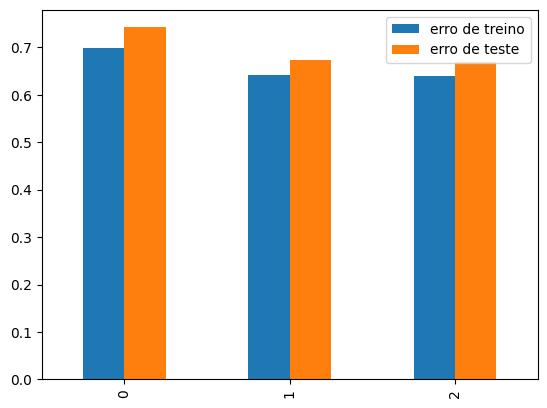

In [ ]:
dados_erro.plot.bar()

Podemos ver que com a média das partições aleatórias a diferença dos erros de treinos e teste diminuiu, agora os erros são bem próximos, isso é um sinal  que a discrepância que ocorria era devido a termos uma partição mais "tendenciosa" para os dados de treino. Ao calcularmos a média , vemos que essa distorção se atenua.